In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('../../data/clean_data.csv')

Text(0.5, 1.0, 'Dependent Variable Distribution')

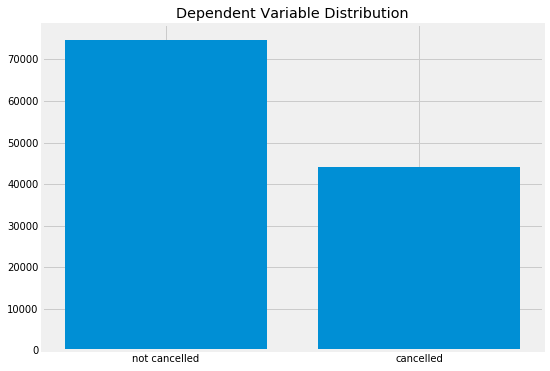

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

vcs = data['is_canceled'].value_counts()

ax.bar(vcs.index, vcs)
ax.set_xticks([0, 1])
ax.set_xticklabels(['not cancelled', 'cancelled'])
ax.set_title('Dependent Variable Distribution')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      118898 non-null  int64  
 1   hotel                           118898 non-null  object 
 2   is_canceled                     118898 non-null  int64  
 3   lead_time                       118898 non-null  int64  
 4   arrival_date_year               118898 non-null  int64  
 5   arrival_date_month              118898 non-null  object 
 6   arrival_date_week_number        118898 non-null  int64  
 7   arrival_date_day_of_month       118898 non-null  int64  
 8   stays_in_weekend_nights         118898 non-null  int64  
 9   stays_in_week_nights            118898 non-null  int64  
 10  adults                          118898 non-null  int64  
 11  children                        118898 non-null  float64
 12  babies          

# Hotel

In [5]:
city_vcs = data[data['hotel'] == 'City Hotel']['is_canceled'].value_counts()
resort_vcs = data[data['hotel'] == 'Resort Hotel']['is_canceled'].value_counts()

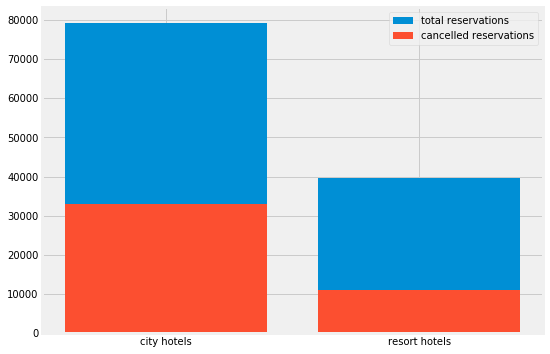

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar([0, 1], [np.sum(city_vcs), np.sum(resort_vcs)], label='total reservations')
ax.bar([0, 1], [city_vcs[1], resort_vcs[1]], label='cancelled reservations')
ax.set_xticks([0, 1])
ax.set_xticklabels(['city hotels', 'resort hotels'])
ax.legend()

# Lead Time

In [7]:
lead_time = data['lead_time']
cancellations = data['is_canceled']

Text(0, 0.5, 'days before arrival')

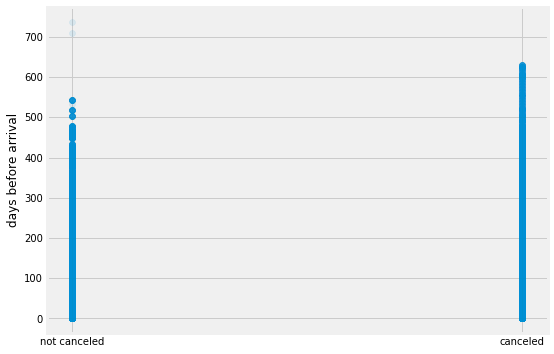

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(cancellations, lead_time, alpha=0.1)
ax.set_xticks([0, 1])
ax.set_xticklabels(['not canceled', 'canceled'])
ax.set_ylabel('days before arrival')

# Stays in weekend/week nights

In [9]:
total = data.groupby('stays_in_weekend_nights')['is_canceled'].count()[:5]
cancels = data.groupby('stays_in_weekend_nights')['is_canceled'].sum()[:5]

In [10]:
cutoff = 3
x = list(total.index[:cutoff])
x.append(cutoff)

y_total = list(total.values[:cutoff])
y_total.append(np.sum(total.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))

Text(0.5, 0, '# of weekend nights')

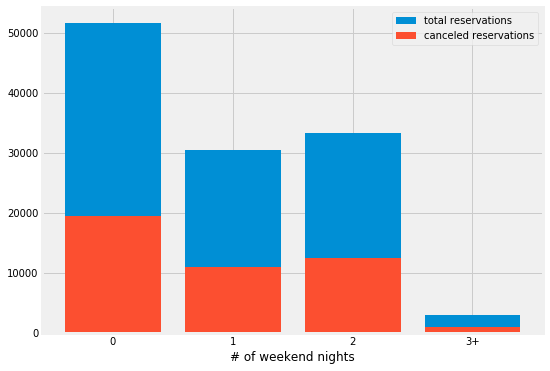

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['0', '1', '2', '3+'])
ax.set_xlabel('# of weekend nights')

In [12]:
total = data.groupby('stays_in_week_nights')['is_canceled'].count()[:11]
cancels = data.groupby('stays_in_week_nights')['is_canceled'].sum()[:11]

In [13]:
cutoff = 6
x = list(total.index[:cutoff])
x.append(cutoff)

y_total = list(total.values[:cutoff])
y_total.append(np.sum(total.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))

Text(0.5, 0, '# of week nights')

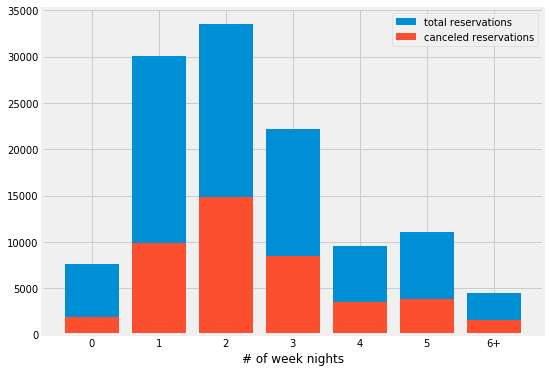

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticklabels(['', '0', '1', '2', '3', '4', '5', '6+'])
ax.set_xlabel('# of week nights')

In [15]:
#data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
total = data.groupby('total_nights')['is_canceled'].count()
cancels = data.groupby('total_nights')['is_canceled'].sum()

In [16]:
cutoff = 8
x = list(total.index[:cutoff])
x.append(cutoff)

y_total = list(total.values[:cutoff])
y_total.append(np.sum(total.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))

Text(0.5, 0, 'total # of nights')

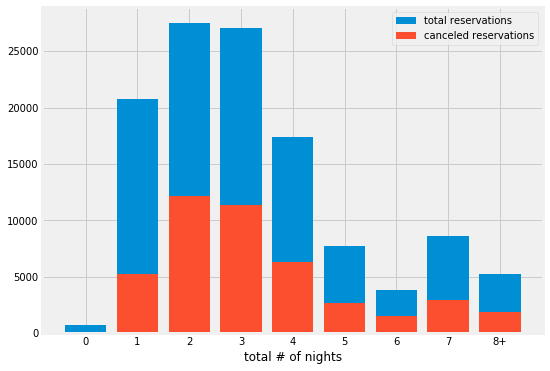

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8+'])
ax.set_xlabel('total # of nights')

# Guest Information
- adults
- children
- babies
- country
- prior information (prior guest, cancellations, bookings)

In [18]:
totals = data.groupby('adults')['is_canceled'].count()
cancels = data.groupby('adults')['is_canceled'].sum()

In [19]:
cutoff = 3
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))

(0.5, 3.5)

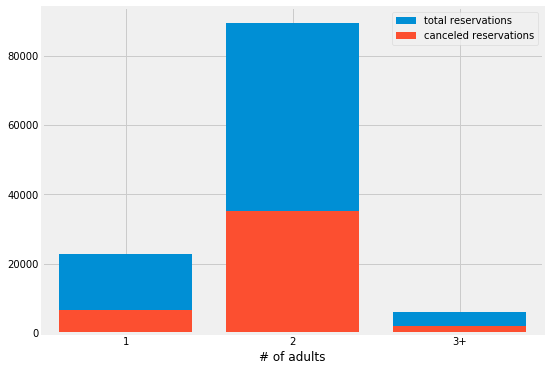

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xlabel('# of adults')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1', '2', '3+'])
ax.set_xlim(0.5, 3.5)

In [21]:
#data['party_size'] = data['adults'] + data['children'] + data['babies']
#data['is_family'] = ((data['children'] != 0) | (data['babies'] != 0)) * 1

(0.5, 4.5)

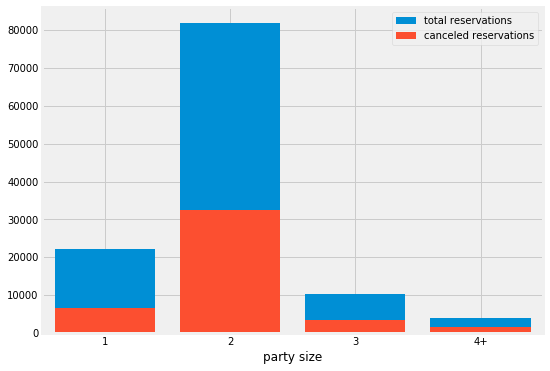

In [22]:
totals = data.groupby('party_size')['is_canceled'].count()
cancels = data.groupby('party_size')['is_canceled'].sum()

cutoff = 4
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xlabel('party size')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1', '2', '3', '4+'])
ax.set_xlim(0.5, 4.5)

[Text(0, 0, 'is not family'), Text(0, 0, 'is family')]

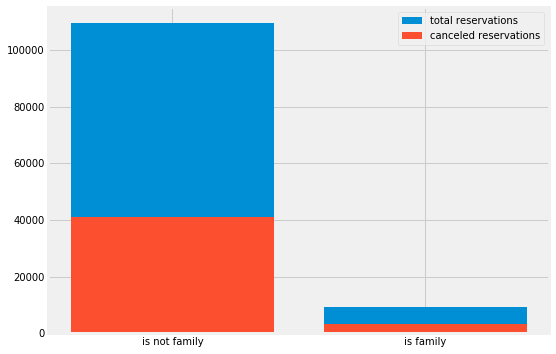

In [23]:
totals = data.groupby('is_family')['is_canceled'].count()
cancels = data.groupby('is_family')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['is not family', 'is family'])

In [24]:
totals = data.groupby('country')['is_canceled'].count()
cancels = data.groupby('country')['is_canceled'].sum()

In [25]:
totals.index[np.argmax(totals)]

'PRT'

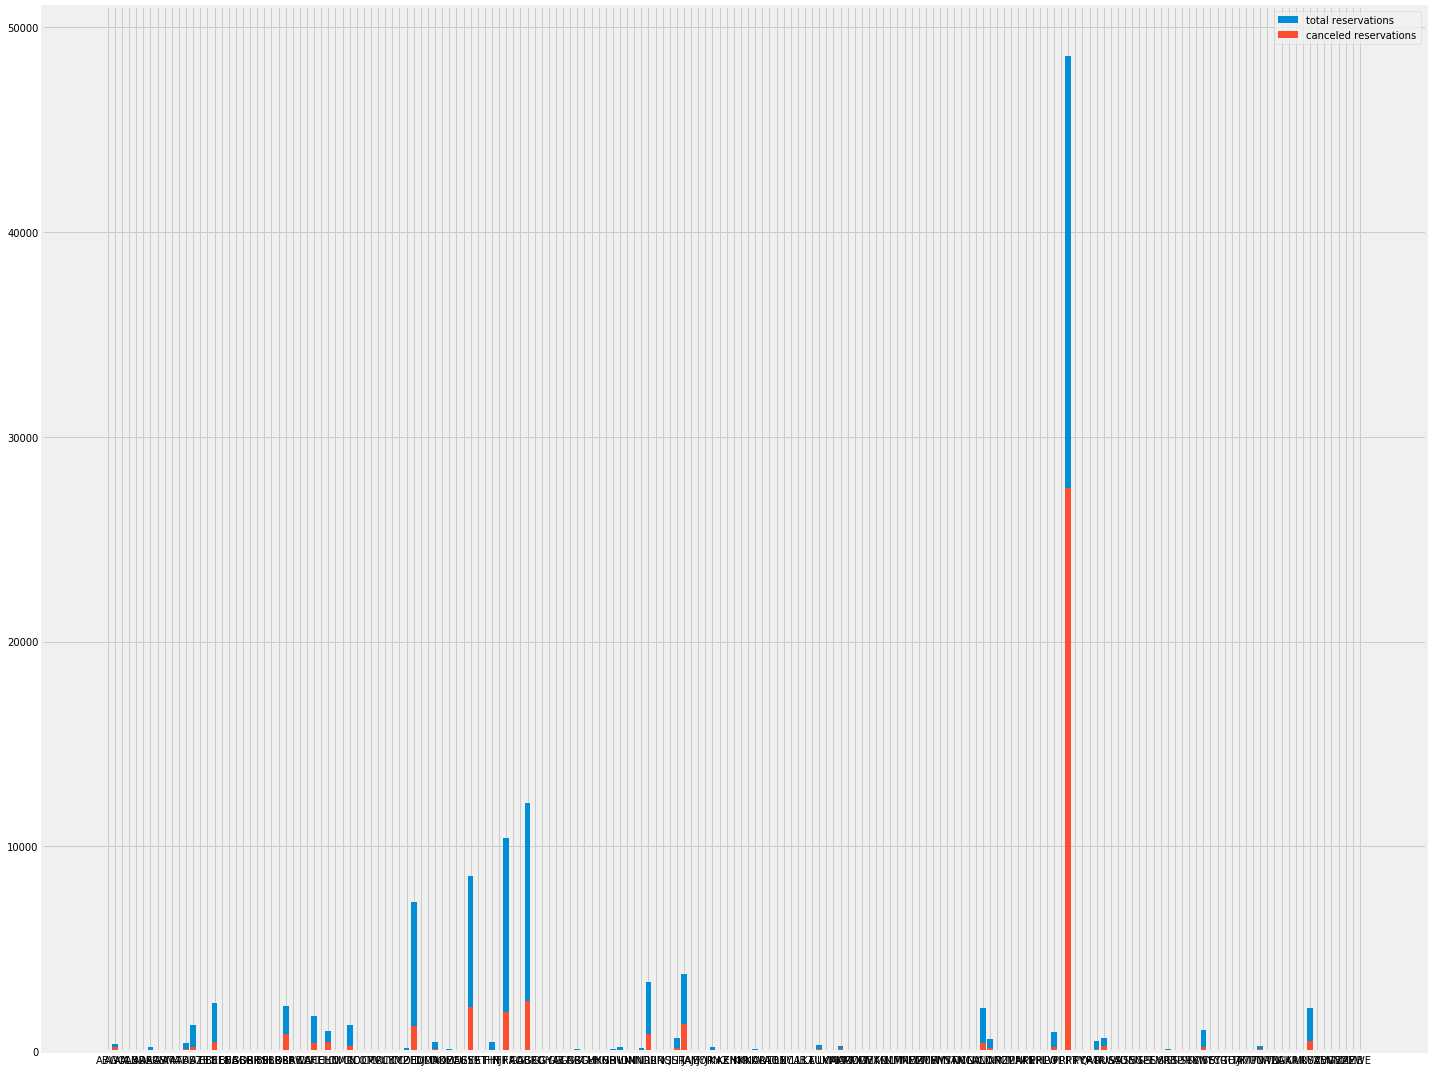

In [26]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()

fig.tight_layout()

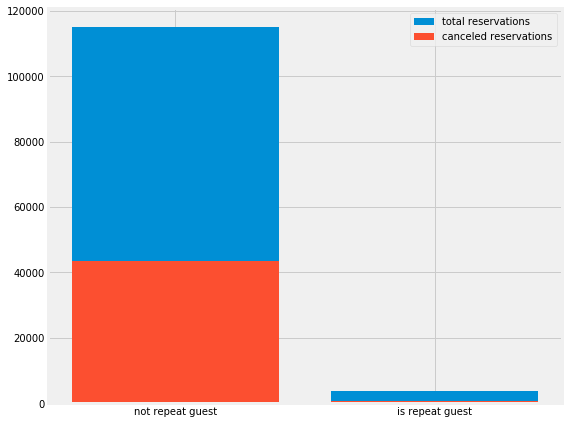

In [16]:
totals = data.groupby('is_repeated_guest')['is_canceled'].count()
cancels = data.groupby('is_repeated_guest')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['not repeat guest', 'is repeat guest'])
fig.tight_layout()

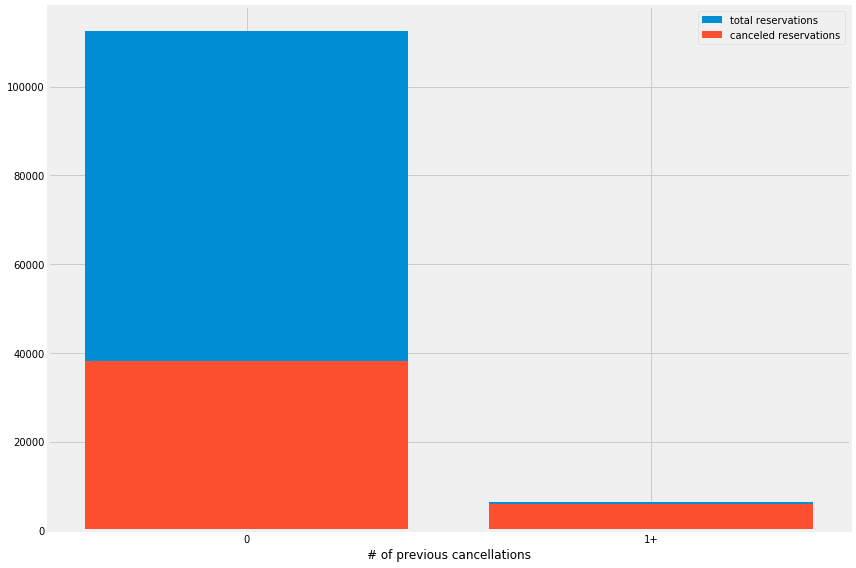

In [28]:
totals = data.groupby('previous_cancellations')['is_canceled'].count()
cancels = data.groupby('previous_cancellations')['is_canceled'].sum()


cutoff = 1
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))


fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1+'])
ax.set_xlabel('# of previous cancellations')
fig.tight_layout()

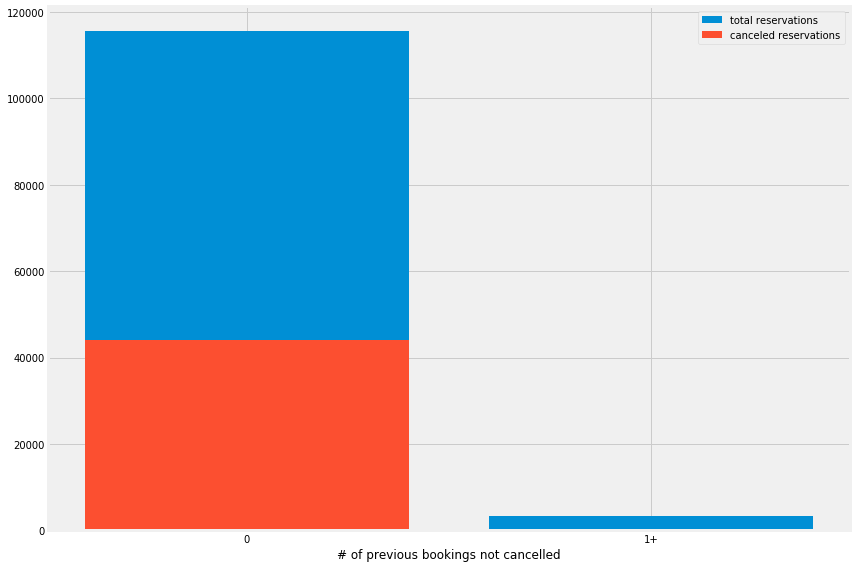

In [29]:
totals = data.groupby('previous_bookings_not_canceled')['is_canceled'].count()
cancels = data.groupby('previous_bookings_not_canceled')['is_canceled'].sum()


cutoff = 1
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))


fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1+'])
ax.set_xlabel('# of previous bookings not cancelled')
fig.tight_layout()

# Reservation information
- meals
- room types (reserved, assigned)
- booking changes
- deposit type
- required parking
- num of special requests
- days booking was in waiting list

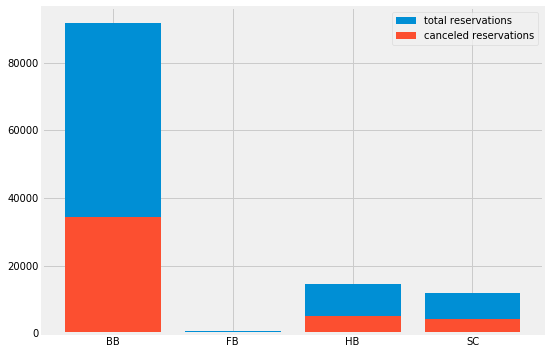

In [30]:
totals = data.groupby('meal')['is_canceled'].count()
cancels = data.groupby('meal')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()



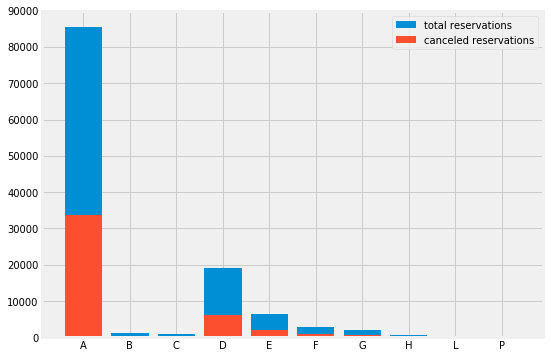

In [31]:
totals = data.groupby('reserved_room_type')['is_canceled'].count()
cancels = data.groupby('reserved_room_type')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()

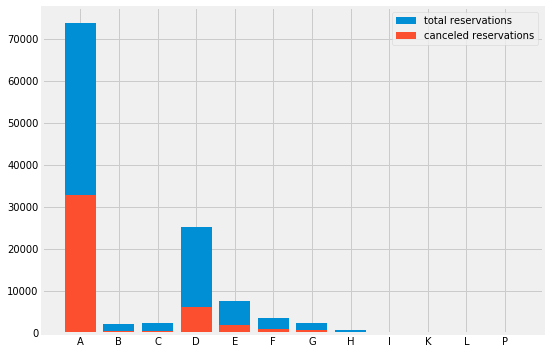

In [32]:
totals = data.groupby('assigned_room_type')['is_canceled'].count()
cancels = data.groupby('assigned_room_type')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()

[Text(0, 0, 'no difference'), Text(0, 0, 'difference')]

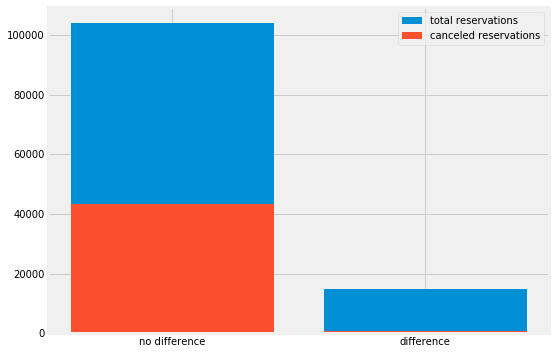

In [33]:
#data['room_difference'] = (data['reserved_room_type'] != data['assigned_room_type']) * 1

totals = data.groupby('room_difference')['is_canceled'].count()
cancels = data.groupby('room_difference')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['no difference', 'difference'])

Text(0.5, 0, '# of booking changes')

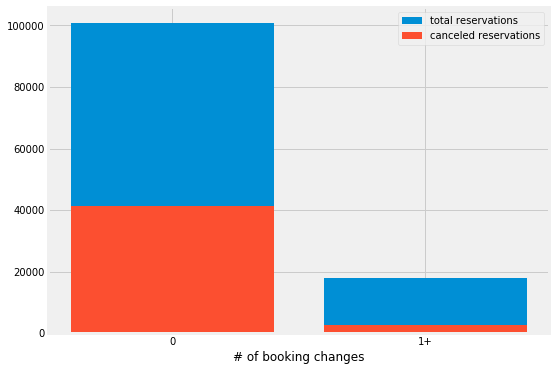

In [34]:
totals = data.groupby('booking_changes')['is_canceled'].count()
cancels = data.groupby('booking_changes')['is_canceled'].sum()

cutoff = 1
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1+'])
ax.set_xlabel('# of booking changes')

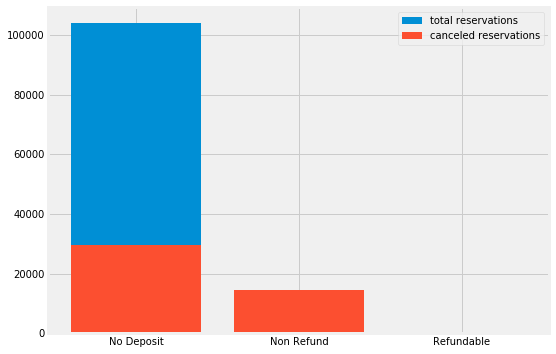

In [35]:
totals = data.groupby('deposit_type')['is_canceled'].count()
cancels = data.groupby('deposit_type')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()

Text(0.5, 0, '# of parking spots')

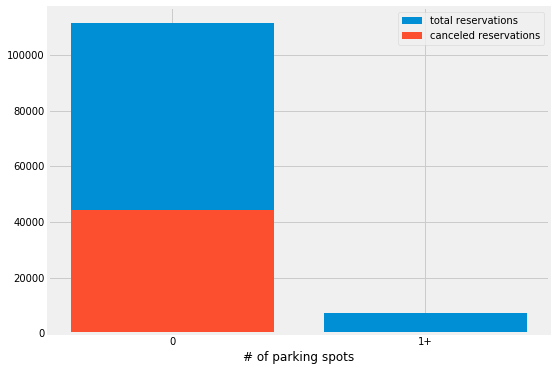

In [36]:
totals = data.groupby('required_car_parking_spaces')['is_canceled'].count()
cancels = data.groupby('required_car_parking_spaces')['is_canceled'].sum()

cutoff = 1
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1+'])
ax.set_xlabel('# of parking spots')

Text(0.5, 0, '# of special requests')

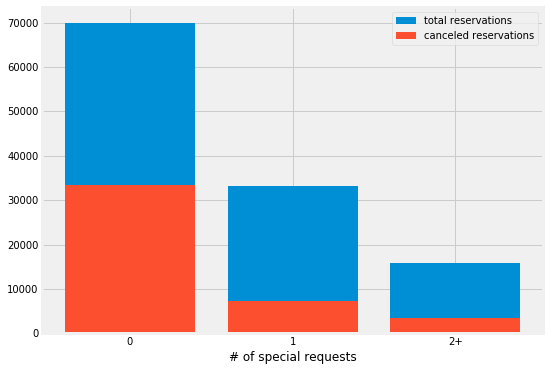

In [37]:
totals = data.groupby('total_of_special_requests')['is_canceled'].count()
cancels = data.groupby('total_of_special_requests')['is_canceled'].sum()

cutoff = 2
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['0', '1', '2+'])
ax.set_xlabel('# of special requests')

Text(0.5, 0, 'days in waiting list')

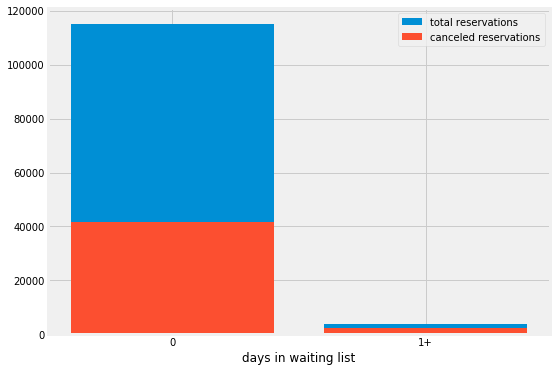

In [38]:
totals = data.groupby('days_in_waiting_list')['is_canceled'].count()
cancels = data.groupby('days_in_waiting_list')['is_canceled'].sum()

cutoff = 1
x = list(totals.index[:cutoff])
x.append(cutoff)

y_total = list(totals.values[:cutoff])
y_total.append(np.sum(totals.values[cutoff:]))

y_cancel = list(cancels.values[:cutoff])
y_cancel.append(np.sum(cancels.values[cutoff:]))


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, y_total, label='total reservations')
ax.bar(x, y_cancel, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1+'])
ax.set_xlabel('days in waiting list')

# Other
- market segment
- distribution channel
- agent
- company
- customer type
- adr

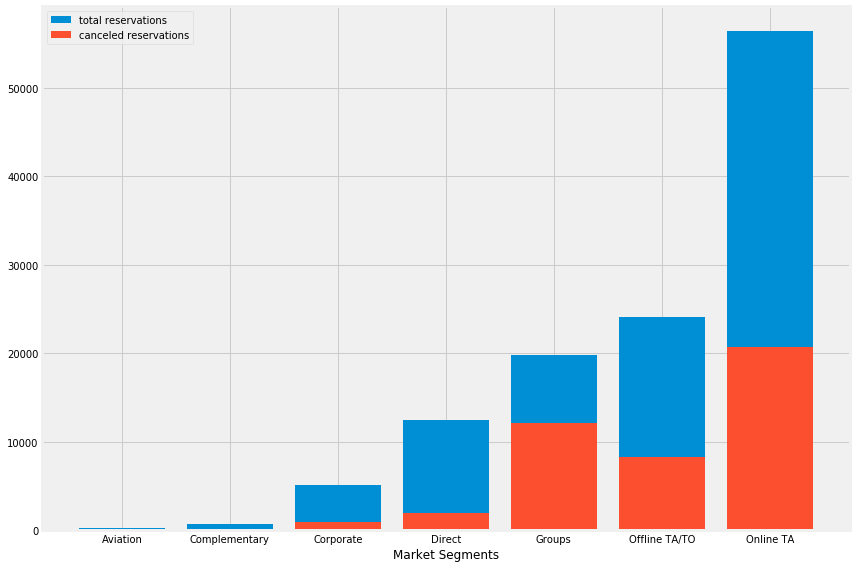

In [39]:
totals = data.groupby('market_segment')['is_canceled'].count()
cancels = data.groupby('market_segment')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xlabel('Market Segments')
fig.tight_layout()

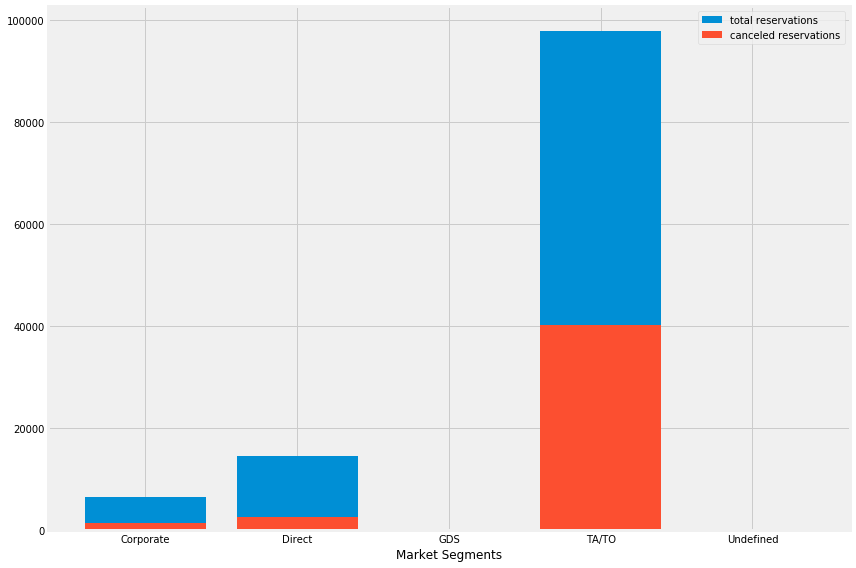

In [40]:
totals = data.groupby('distribution_channel')['is_canceled'].count()
cancels = data.groupby('distribution_channel')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xlabel('Market Segments')
fig.tight_layout()

[Text(0, 0, 'did not have agent'), Text(0, 0, 'had agent')]

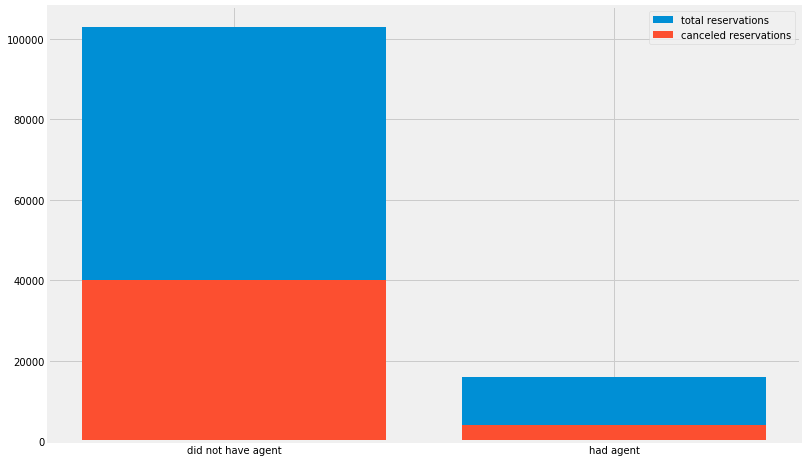

In [41]:
#data['had_agent'] = (data['agent'] == -1) * 1
totals = data.groupby('had_agent')['is_canceled'].count()
cancels = data.groupby('had_agent')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['did not have agent', 'had agent'])
#ax.set_xlabel('Market Segments')
#fig.tight_layout()

[Text(0, 0, 'did not have company'), Text(0, 0, 'had company')]

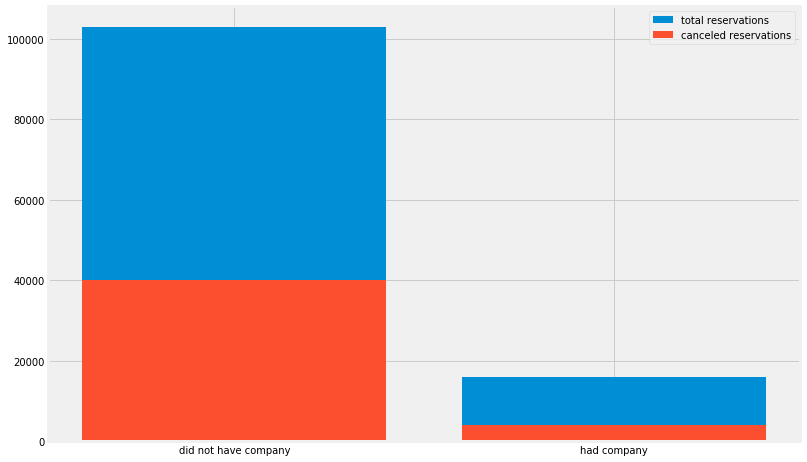

In [42]:
#data['had_company'] = (data['agent'] == -1) * 1
totals = data.groupby('had_company')['is_canceled'].count()
cancels = data.groupby('had_company')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()
ax.set_xticks([0, 1])
ax.set_xticklabels(['did not have company', 'had company'])
#ax.set_xlabel('Market Segments')
#fig.tight_layout()

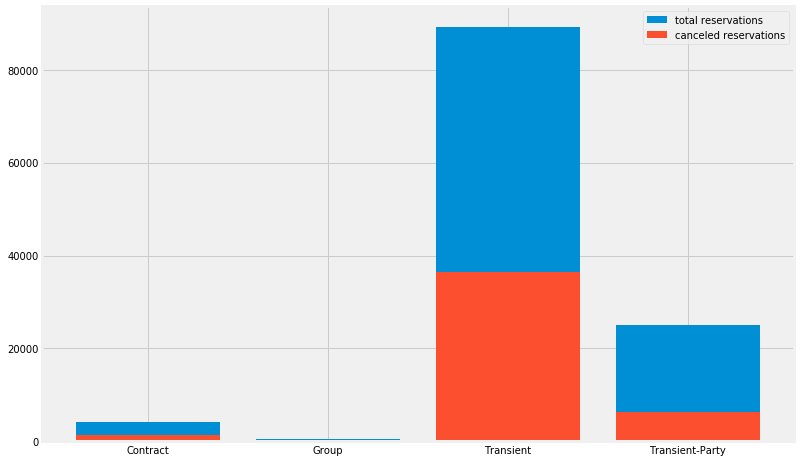

In [43]:
totals = data.groupby('customer_type')['is_canceled'].count()
cancels = data.groupby('customer_type')['is_canceled'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(totals.index, totals.values, label='total reservations')
ax.bar(cancels.index, cancels.values, label='canceled reservations')
ax.legend()

(0, 600)

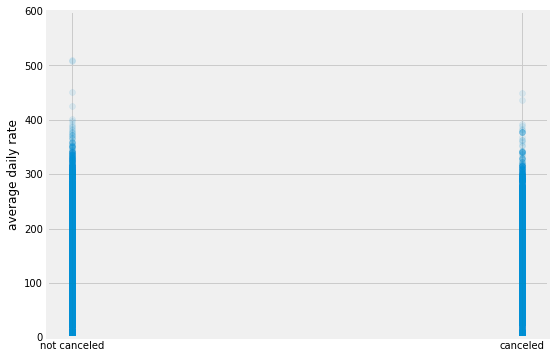

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data['is_canceled'], data['adr'], alpha=0.1)
ax.set_xticks([0, 1])
ax.set_xticklabels(['not canceled', 'canceled'])
ax.set_ylabel('average daily rate')
ax.set_ylim(0, 600)

# Metrics

In [10]:
data['adr'].mean()

102.00324252720587

In [11]:
data['adr'].median()

95.0

In [14]:
data['total_nights'].mean()

3.431041733250349

In [15]:
data['total_nights'].median()

3.0

In [ ]:
102 x 3 = 306

|             | Pred. Cancel | Pred. Not |
|-------------|--------------|-----------|
| Act. Cancel |     $306     |     $0    |
| Not Cancel  |    -$3060    |    $306   |
 
 
 In this situation, false positives are extremely costly, while false negatives are not. Accordingly, the metric that I want to use when evaluating models is precision, since it focuses on maximizing true positives and minimizing false positives.

# Splitting Data
- split based on cancel/not cancel.
- also reserve the last 2(?) months of data for time series

In [53]:
from sklearn.model_selection import train_test_split

In [93]:
#train, test = train_test_split(data, test_size=0.2, shuffle=True)

In [94]:
#train.to_csv('../data/train/cancellations.csv', index=False)
#test.to_csv('../data/test/cancellations.csv', index=False)

In [67]:
import datetime

In [78]:
data[['arrival_date_year', 'arrival_date_day_of_month']] = data[['arrival_date_year', 'arrival_date_day_of_month']].astype(str)

In [89]:
dates = []
for item in (data['arrival_date_year'] + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month']).values:
    dates.append(datetime.datetime.strptime(item, '%Y-%B-%d'))

In [91]:
data['full_date'] = dates

In [3]:
test = data[data['full_date'] >= '2017-08-01']

In [4]:
train = data[~data.index.isin(test.index)]

In [6]:
#train.to_csv('../../data/train/dates.csv', index=False)
#test.to_csv('../../data/test/dates.csv', index=False)